<a href="https://colab.research.google.com/github/Murcha1990/ML_AI25/blob/main/Hometasks/Base/HW1_Regression_with_inference_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (base). Часть 1**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;

**Максимальная оценка за дз**
> Оценка за первую часть домашки = $min(\text{ваш балл}, 7)$


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.**

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Давайте зафиксируем важный момент.

**Задание 0 (0 баллов).**
Изучите и ответье на вопрос: для чего фиксируем сиды в домашках?

Для воспроизводимости! Чтобы можно было запускать n раз один и тот же код и n раз получать один и тот же результат

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [2]:
import pandas as pd

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.5 балла)**

Вы уже встречались с pandas в первой половине семестра. Теперь будем постоянно (кроме некоторых случаев) использовать его для анализа данных и наслаивать навыки. Выполните операции, направленные на практику основных действий с `pandas`:

**0.1 балла**
- [ ] Отобразите 30 случайных строк тренировочного датасета.
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения
- [ ] Посмотрите, есть ли в данных явные дубликаты


**0.2 балла**
Ответьте на вопросы:
- [ ] Выводы о чем можно сделать, используя случайные/верхние/нижние строки? А о чем нельзя?
- [ ] Достаточно ли метода duplicated для анализа дубликатов? Почему?

**0.15 балла**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)

In [4]:
df_train.sample(30)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


In [5]:
df_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0


In [6]:
df_train.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
6996,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0
6998,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [7]:
null_cols = df_train.columns[df_train.isnull().any()].tolist()
null_cols

['mileage', 'engine', 'max_power', 'torque', 'seats']

In [8]:
df_train[df_train.duplicated()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
326,Jaguar XF 2.0 Diesel Portfolio,2017,3200000,45000,Diesel,Dealer,Automatic,First Owner,19.33 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6880,Renault Captur 1.5 Diesel RXT,2018,1265000,12000,Diesel,Individual,Manual,First Owner,20.37 kmpl,1461 CC,108.45 bhp,240Nm@ 1750rpm,5.0
6881,Maruti Ciaz Alpha Diesel,2019,1025000,32000,Diesel,Individual,Manual,First Owner,28.09 kmpl,1248 CC,88.50 bhp,200Nm@ 1750rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


На самом деле первые, последние и случайные строки показывают вполне похожие распределения фичей. Это значит, что датасет скорее всего был уже зашафлен, так что нам при обучении модели это делать не придется (по-хорошему бы нам было нужно это сделать, если бы мы обучали модель батчами).

Потому что этот метод находит только полные дубликаты, а иногда может быть смысл находить частичные дубликаты. Или, например, строки могут отличаться только наличием пробела в какой-то одной колонке. В общем метод duplicated может быть слишком чувствителен и в реальности нам нужно что-то более гибкое

Мы обнаружили пропуски. Давайте избавимся от них.

**(0.05 балла)**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [9]:
for col in null_cols:
    try:
        median = df_train[col].median()
        df_train[col].fillna(median, inplace=True)
        df_test[col].fillna(median, inplace=True)
    except Exception:
        print(f'У категориальных фичей ({col}) не может быть медианы :(')

У категориальных фичей (mileage) не может быть медианы :(
У категориальных фичей (engine) не может быть медианы :(
У категориальных фичей (max_power) не может быть медианы :(
У категориальных фичей (torque) не может быть медианы :(


In [10]:
df_train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats              0
dtype: int64

### **Задание 2 (0.5 балла)**

На прошлом шаге вы рассмотрели дубликаты. Однако дубликат может быть связан с не только полным повторением информации в нескольких строках, но и частиным. Например, объект мог был внесен в базу данных с разным значением целевой переменной. В этом шаге займемся такими дублями!

**Ваши действия:**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [11]:
features_list = list(df_train.drop(columns=['selling_price']).columns)

In [12]:
df_train.duplicated(
    subset=features_list
).sum()

1159

In [13]:
df_train[df_train.duplicated(subset=features_list)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,400000,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,140000,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [14]:
df_train = df_train.drop_duplicates(subset=features_list, keep='first')

In [15]:
df_train = df_train.reset_index().drop(columns=['index'])

In [16]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [17]:
df_train['mileage'] = df_train['mileage'].str.split().apply(
    lambda val: float(val[0]) if type(val) == list and len(val) == 2 else (val if type(val) == float else None)
)
df_train['max_power'] = df_train['max_power'].str.split().apply(
    lambda val: float(val[0]) if type(val) == list and len(val) == 2 else (val if type(val) == float else None)
)
df_train['engine'] = df_train['engine'].str.split().apply(
    lambda val: float(val[0]) if type(val) == list and len(val) == 2 else (val if type(val) == float else None)
)
df_train.drop(
    columns=['torque'],
    inplace=True
)

In [18]:
df_test['mileage'] = df_test['mileage'].str.split().apply(
    lambda val: float(val[0]) if type(val) == list and len(val) == 2 else (val if type(val) == float else None)
)
df_test['max_power'] = df_test['max_power'].str.split().apply(
    lambda val: float(val[0]) if type(val) == list and len(val) == 2 else (val if type(val) == float else None)
)
df_test['engine'] = df_test['engine'].str.split().apply(
    lambda val: float(val[0]) if type(val) == list and len(val) == 2 else (val if type(val) == float else None)
)
df_test.drop(
    columns=['torque'],
    inplace=True
)

In [19]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92,1086.0,62.10,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,5.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0


In [20]:
for col in null_cols:
    if col == 'torque':
        continue
    try:
        median = df_train[col].median()
        df_train[col].fillna(median, inplace=True)
        df_test[col].fillna(median, inplace=True)
    except Exception:
        print(f'У категориальных фичей ({col}) не может быть медианы :(')

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [21]:
df_train['engine'].astype(int)
df_train['seats'].astype(int)
df_test['engine'].astype(int)
df_test['seats'].astype(int)
df_train.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
seats            float64
dtype: object

### **Задание 5 (0.15 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сделайте вывод.

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [22]:
df_train.sample()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
635,Mahindra XUV500 W8 2WD,2014,650000,90000,Diesel,Individual,Manual,Second Owner,15.1,2179.0,140.0,7.0


In [23]:
cat_cols = ['name', 'fuel', 'seller_type', 'transmission', 'owner']
num_cols = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']

In [24]:
df_train[cat_cols].describe()

,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,1924,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,91,3177,5223,5336,3603


In [25]:
df_train[num_cols].describe()

,year,km_driven,mileage,engine,max_power,seats,selling_price
count,5840.000000,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000,5.840000e+03
mean,2013.428425,7.395224e+04,19.430841,1429.448973,87.948422,5.426712,5.229601e+05
std,4.095622,6.007114e+04,3.985973,485.662834,31.577884,0.982344,5.354320e+05
min,1983.000000,1.000000e+00,0.000000,624.000000,32.800000,2.000000,2.999900e+04
25%,2011.000000,3.900000e+04,16.950000,1197.000000,68.000000,5.000000,2.500000e+05
50%,2014.000000,7.000000e+04,19.370000,1248.000000,81.860000,5.000000,4.050000e+05
75%,2017.000000,1.000000e+05,22.300000,1498.000000,99.000000,5.000000,6.400000e+05
max,2020.000000,2.360457e+06,42.000000,3604.000000,400.000000,14.000000,1.000000e+07


In [26]:
assert df_train.shape == (5840, 12)

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

/Users/iliakozhevnikov/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


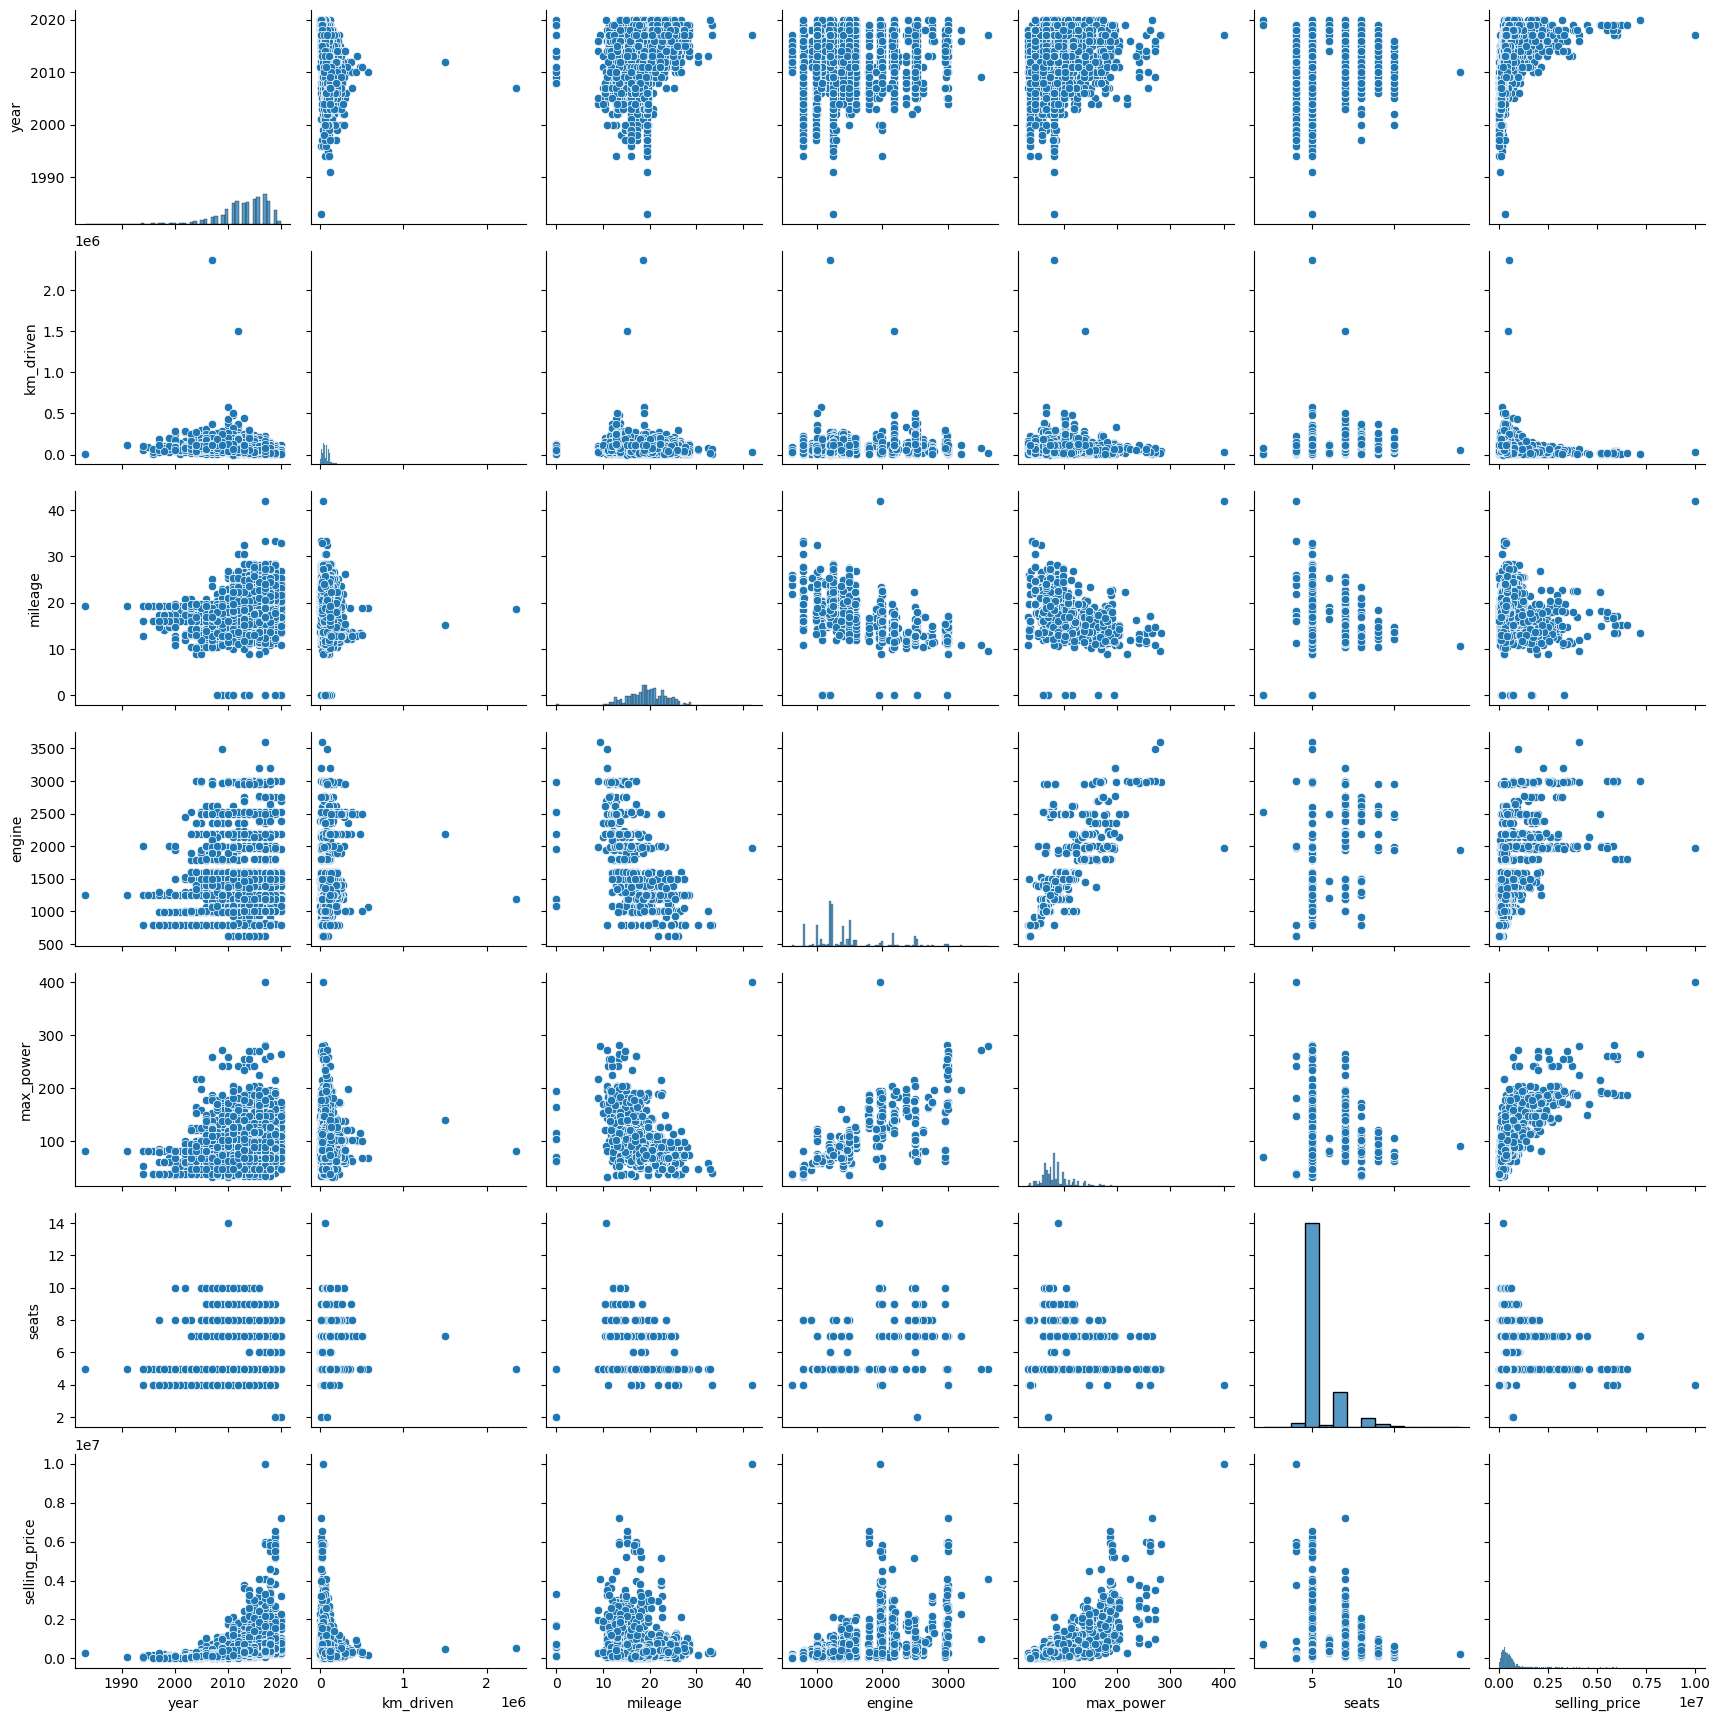

In [27]:
sns.pairplot(df_train[num_cols])

Это не очень удобно (в идеале бы посмотреть на корреляцию), но вполне возможно. Например, мы можем видеть, что чем больше max_power, тем дороже автомобиль. Логично. Или, например, с двигателем то же самое - чем больше значение фичи, тем больше таргет.

То же самое. Ведь к таргету в этом вопросе мы можем отнестись как просто к признаку, а, значит, корреляцию между признаками тоже можно определить по графику. Например, чем больше значение фичи engine, тем выше max_power (тоже более чем логично)

/Users/iliakozhevnikov/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


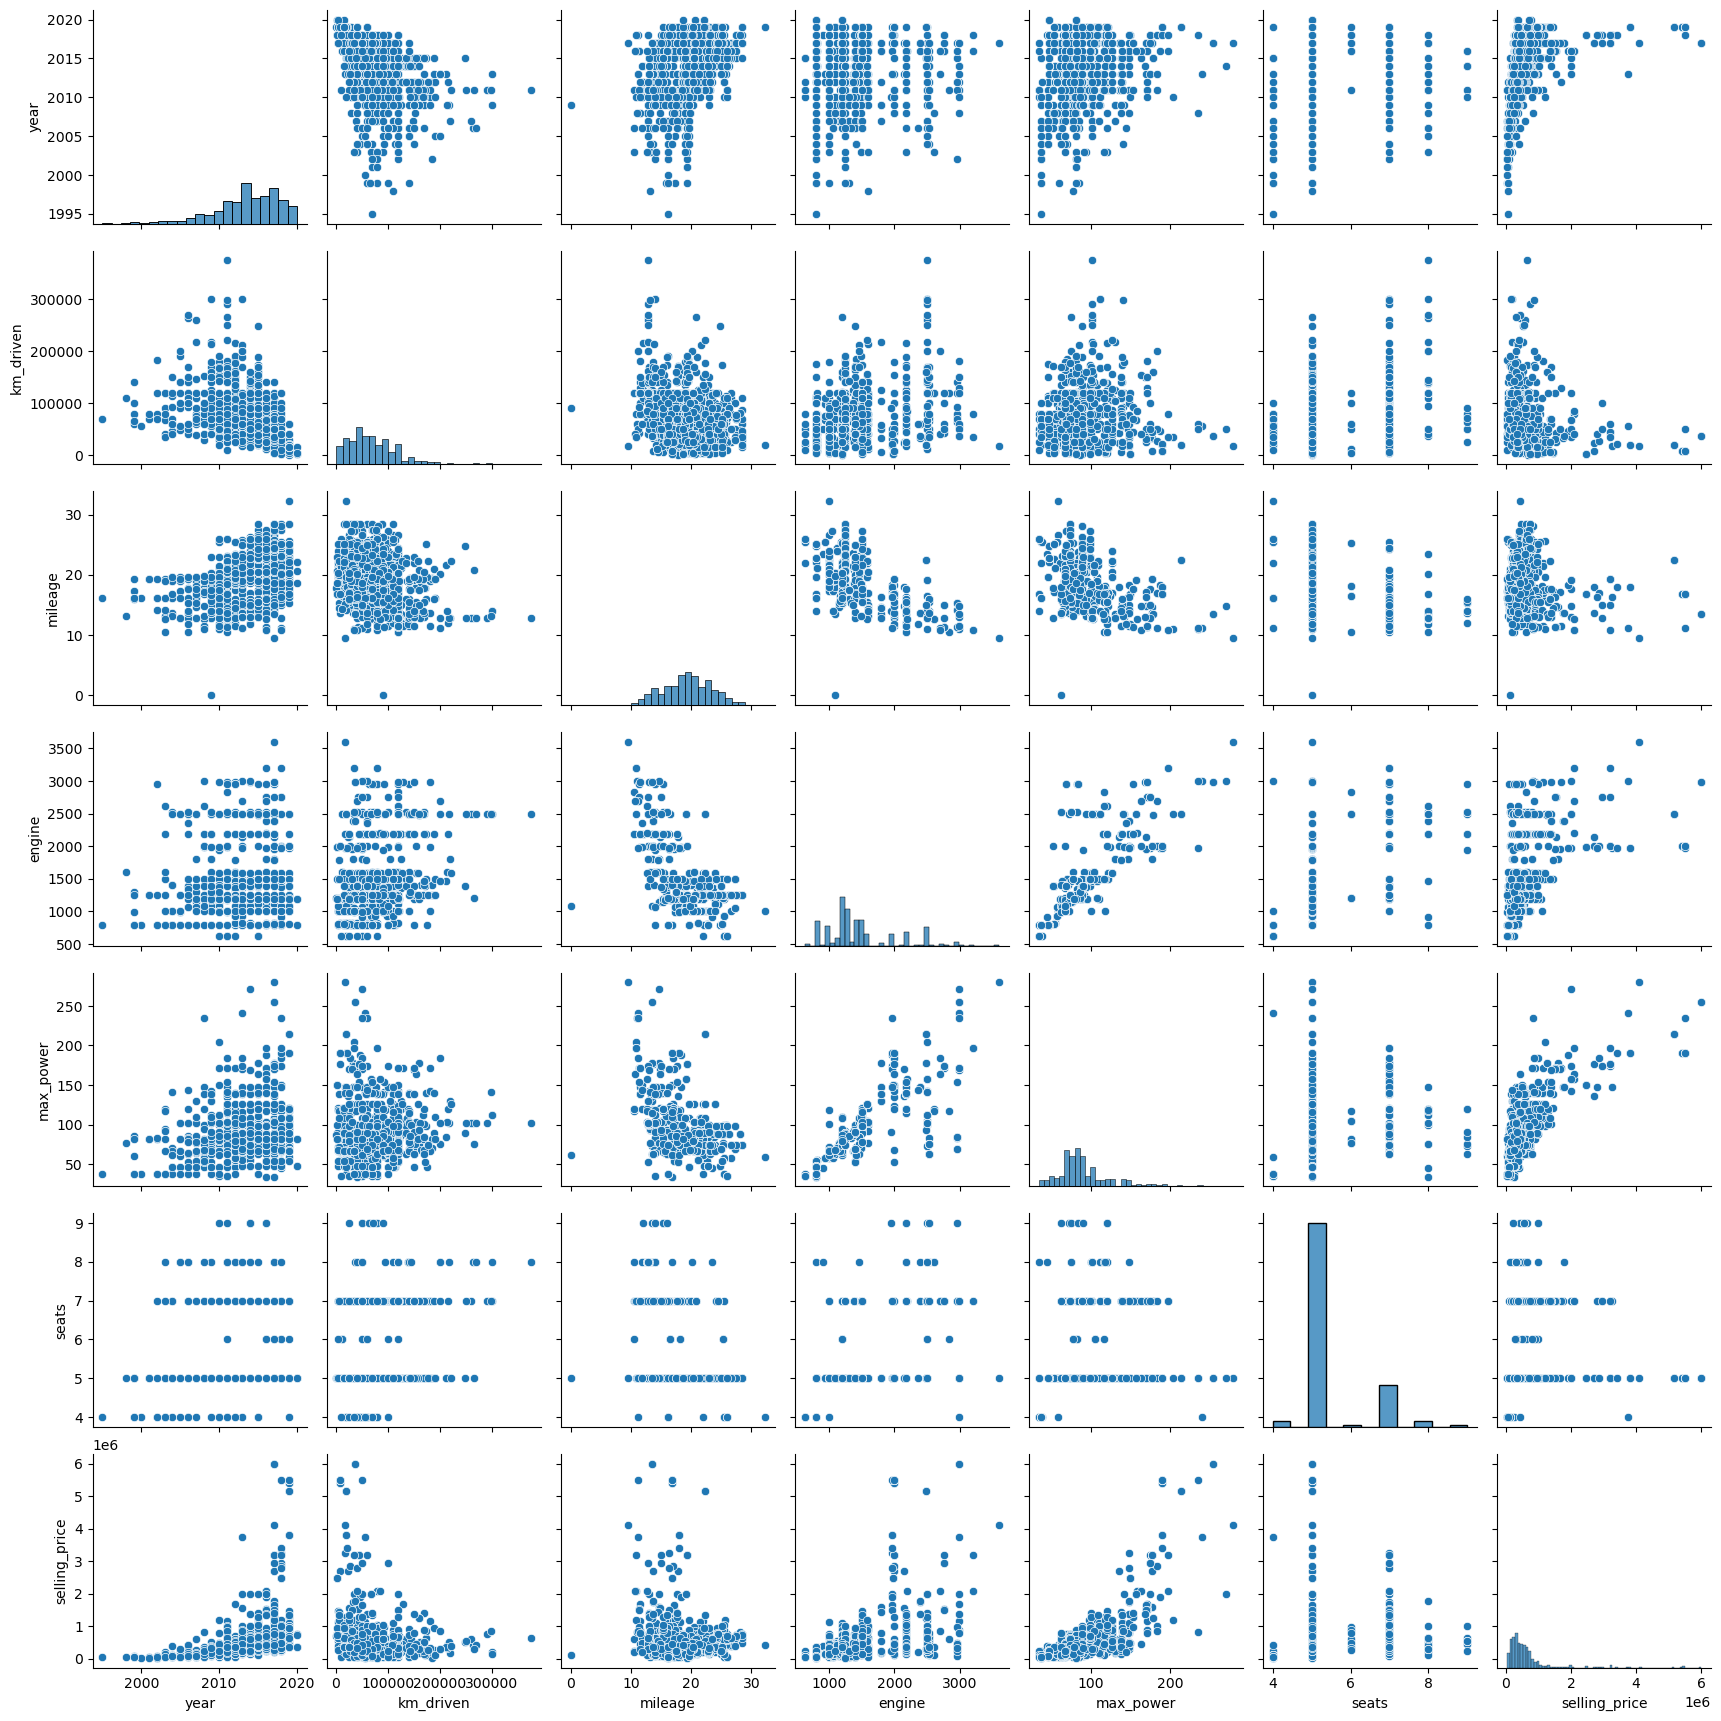

In [28]:
sns.pairplot(df_test[num_cols])

Глобально картины похожи, но местами можно найти различия. Например, таргет в тестовой группе распределен довольно по-другому - у него и больше дисперсия, и среднее значение. Это хорошо видно на графике справа снизу.

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


In [29]:
corr = df_train[num_cols].corr()
corr

,year,km_driven,mileage,engine,max_power,seats,selling_price
year,1.000000,-0.368966,0.341334,0.002819,0.157138,0.041178,0.427279
km_driven,-0.368966,1.000000,-0.182086,0.229766,0.024539,0.192328,-0.164828
mileage,0.341334,-0.182086,1.000000,-0.572893,-0.374150,-0.451059,-0.104769
engine,0.002819,0.229766,-0.572893,1.000000,0.681968,0.652172,0.447672
max_power,0.157138,0.024539,-0.374150,0.681968,1.000000,0.244017,0.693742
seats,0.041178,0.192328,-0.451059,0.652172,0.244017,1.000000,0.149953
selling_price,0.427279,-0.164828,-0.104769,0.447672,0.693742,0.149953,1.000000


<Axes: >

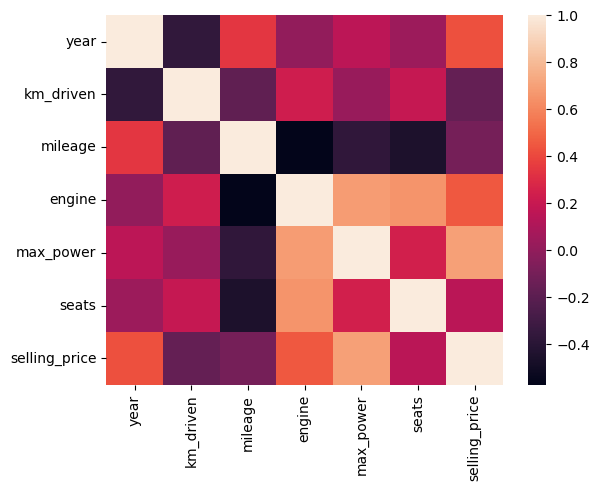

In [30]:
sns.heatmap(corr)

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

- если имеется в виду по модулю (т.е. между какими фичами меньше всего связи), то engine и year. Если по абсолютному значению (даже если идеальная корреляция, но обратная), то engine и mileage
- max_power и engine (0.681968)
- в общем случае да

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

- Каждая дополнительная визуализация может принести до 0.25 баллов при условии, что она обоснована.

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Сделайте тренировочный и тестовый наборы. Сделайте на тренировочный и тестовый наборы. Она уже даны, достаточно просто отделить целевой признак Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных. Используйте уже имеющиеся данные train и test при разбиении. Если считаете уместным применить какую-то более хитрую технику разбиения — примените, но опишите, зачем.

In [31]:
df_train_numerical = df_train[num_cols]
df_test_numerical = df_test[num_cols]

In [32]:
y_train = df_train_numerical.selling_price
X_train = df_train_numerical.drop(columns=['selling_price'])

In [33]:
# опишите выбранные вещественные признаки

In [34]:
y_test = df_test_numerical.selling_price
X_test = df_test_numerical.drop(columns=['selling_price'])

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_y_pred = lr.predict(X_test)

print('R2:', r2_score(y_test, lr_y_pred))
print('MSE:', MSE(y_test, lr_y_pred))

R2: 0.5946576472666445
MSE: 233002359160.80362


R^2 на самом деле получился относительно неплохой, наша модель объясняет 59% дисперсии таргета.
А по MSE судить сложно, так как это неинтерпретируемая метрика. Ее даже чаще воспринимают не как метрику, а как просто лосс, так как по одной этой цифре почти ничего нельзя понять.

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [36]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = pd.DataFrame(
    columns=X_train.columns,
    data=ss.fit_transform(X_train)
)
X_test = pd.DataFrame(
    columns=X_test.columns,
    data=ss.transform(X_test)
)

In [37]:
ss_lr = LinearRegression()
ss_lr.fit(X_train, y_train)
ss_lr_y_pred = ss_lr.predict(X_test)

print('R2:', r2_score(y_test, ss_lr_y_pred))
print('MSE:', MSE(y_test, ss_lr_y_pred))

R2: 0.5946576472666558
MSE: 233002359160.79712


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [38]:
ss_lr.coef_, ss_lr.intercept_

(array([152247.33086876, -44066.18021284,  29319.18102634,  59324.98036527,
        324496.85782122, -22159.18786684]),
 522960.0910958868)

In [39]:
X_train.columns

Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats'], dtype='object')

max_power (324496.85782122)

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [40]:
from sklearn.linear_model import Lasso

lasso_lr = Lasso()
lasso_lr.fit(X_train, y_train)
lasso_y_pred = lasso_lr.predict(X_test)

print('R2:', r2_score(y_test, lasso_y_pred))
print('MSE:', MSE(y_test, lasso_y_pred))

R2: 0.5946564811772825
MSE: 233003029462.2673


In [41]:
lasso_lr.coef_, lasso_lr.intercept_

(array([152247.14742736, -44065.05085353,  29317.30055383,  59320.137094  ,
        324497.75189092, -22156.30524519]),
 522960.0910958868)

Нет, не занулила. Причина тому - важность каждого признака. Каждый признак значительно связан с таргетом, поэтому и занулять нечего.

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [42]:
from sklearn.model_selection import GridSearchCV

# your code here

In [43]:
# your code here

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [44]:
from sklearn.linear_model import ElasticNet

# your code here

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


**Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [45]:
# your code here

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

**Бонус 0.25 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления. Если предобработали столбец — можно закомментировать assert

In [46]:
assert X_train_cat.shape == (5840, 10)

NameError: name 'X_train_cat' is not defined

In [ ]:
X_train_cat.describe(include='object')

### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [ ]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

# your code here

### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# your code here

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какая лучше всего решает задачу бизнеса

In [47]:
def business_metric(y_true, y_pred):
    df = pd.DataFrame(
        {
            'gt': y_true,
            'pred': y_pred
        }
    )
    df['diff_smaller_than_10_p'] = abs(1 - df['gt'] / df['pred']) <= 0.1
    
    share = df[df['diff_smaller_than_10_p'] == True].shape[0] / df.shape[0]
    
    return share

print(business_metric(y_test, lr_y_pred))
print(business_metric(y_test, ss_lr_y_pred))
print(business_metric(y_test, lasso_y_pred))

0.217
0.217
0.217


Как мы видим, разницы между моделями в нашей бизнес метрике нет.

In [51]:
import pickle

In [56]:
with open('lr_model.pkl', 'wb') as f:
    pickle.dump(lr, f)
with open('standardized_lr_model.pkl', 'wb') as f:
    pickle.dump(ss_lr, f)
with open('lasso_lr_model.pkl', 'wb') as f:
    pickle.dump(lasso_lr, f)
    
with open('standardizer.pkl', 'wb') as f:
    pickle.dump(ss, f)

# **<font color="green">Часть 5 | Создание интерактивного приложения на Streamlit (3 балла)</font>**

Вам необходимо создать интерактивное приложение на Streamlit, которое будет:

- Показывать основные информативные графики/гистограммы в рамках EDA (1 балл)
- На вход запрашивать csv-файл с признаками объектов или запрашивать признаки объекта в окошках для ввода, и применять на поступивших объектах модель (1 балл)
- Визуализировать веса обученной модели (1 балл)

# **Часть 6 | Оформление репозитория и оценка сервиса (3 балла)**

**Результаты вашей работы** необходимо разместить в своём GitHub-репозитории. В этот же репозиторий позже будет добавлена вторая часть.

Под результатами первой части понимаем следующее:

---

### Обязательные файлы:

1. **`.ipynb`-ноутбук** со всеми экспериментами:

   * полный EDA,
   * все шаги препроцессинга,
   * обучение и сравнение моделей,
   * сохранённые output’ы.

2. **`.pickle`-файл**, содержащий:

   * обученную модель (или пайплайн `scaler + model`);
   * параметры скейлинга;
   * любые числовые объекты, необходимые для инференса внутри Streamlit-приложения.

3. **`.md`-файл с выводами** о проделанной работе:

   * что было сделано (краткое описание каждого этапа);
   * какие результаты были получены (метрики + интерпретация);
   * что дало наибольший прирост качества;
   * что сделать не удалось и почему (это нормально и даже полезно);
   * **оценка разработанного сервиса**:

     * насколько приложение удобно в использовании;
     * что получилось визуализировать хорошо, а что — менее удачно;
     * какие ограничения или проблемы вы заметили;
     * какие улучшения планируете в следующей итерации.

По результатам второй части, ждем:

4. **Streamlit-приложение** (например, `app.py`), которое можно запустить командой:

   ```bash
   streamlit run app.py
   ```

**И ссылку на приложение в StreamlitHub.**

В приложении должно быть:

* отображение ключевых графиков EDA;
* ввод данных (CSV или ручной ввод);
* применение модели;
* визуализация весов/коэффициентов.



### **За что могут быть сняты баллы:**

* отсутствие `.pickle` с моделью / пайплайном;
* слабая или неполная аналитика в `.md`-файле;
* беспорядок в ноутбуке или неясная логика вычислений;
* отсутствие возможности запустить Streamlit-приложение.